In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot

In [3]:
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='grade3')

In [4]:
def softmax(v):
    exp_v = np.exp(v)
    return exp_v/exp_v.sum(axis=1, keepdims=True)

In [5]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [6]:
def classification_rate(Y, Y_hat):
    return np.mean(Y==Y_hat)

In [7]:
tmp = np.random.randn(100, 2)
print(softmax(tmp), softmax(tmp).sum(axis=1))

[[0.27593947 0.72406053]
 [0.23205329 0.76794671]
 [0.90703687 0.09296313]
 [0.71537868 0.28462132]
 [0.43623887 0.56376113]
 [0.85496093 0.14503907]
 [0.6169846  0.3830154 ]
 [0.32758925 0.67241075]
 [0.03754664 0.96245336]
 [0.32540495 0.67459505]
 [0.13213817 0.86786183]
 [0.81057442 0.18942558]
 [0.72261232 0.27738768]
 [0.22132614 0.77867386]
 [0.27762691 0.72237309]
 [0.13931304 0.86068696]
 [0.44225021 0.55774979]
 [0.81155695 0.18844305]
 [0.5685004  0.4314996 ]
 [0.86965425 0.13034575]
 [0.61770152 0.38229848]
 [0.66813246 0.33186754]
 [0.68145137 0.31854863]
 [0.84924324 0.15075676]
 [0.70600252 0.29399748]
 [0.55985415 0.44014585]
 [0.66295666 0.33704334]
 [0.41107853 0.58892147]
 [0.84945056 0.15054944]
 [0.42762626 0.57237374]
 [0.71086737 0.28913263]
 [0.4096366  0.5903634 ]
 [0.04768194 0.95231806]
 [0.09662945 0.90337055]
 [0.67261826 0.32738174]
 [0.39453253 0.60546747]
 [0.24908052 0.75091948]
 [0.50187111 0.49812889]
 [0.53853437 0.46146563]
 [0.24693863 0.75306137]


In [68]:
Nclass = 500

X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

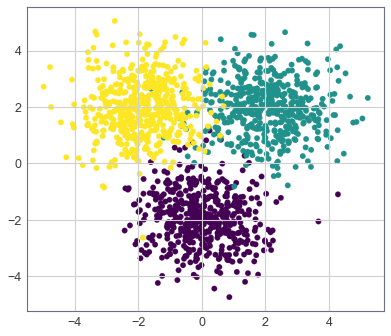

In [69]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [70]:
D = 2 # number of features
M = 3 # number of hidden layers
K = 3 # number of classes

In [71]:
T = np.zeros((1500, K))
for i in range(1500):
    T[i, Y[i]] = 1

In [72]:
# initialize weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)

W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [73]:
def forward(X, W1, b1, W2, b2):
    a1 = X.dot(W1) + b1
    z = sigmoid(a1)
    
    a2 = z.dot(W2) + b2
    Y_hat = softmax(a2)
    
    return Y_hat, z

In [74]:
def dJ_dw2(T, Y, Z):
    return Z.T.dot(T-Y)

In [75]:
def dJ_dw1(T, Y, Z, X, W2):
    return X.T.dot((T-Y).dot(W2.T) * Z * (1-Z))

In [76]:
def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)

In [77]:
def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)

In [78]:
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

In [79]:
P_Y_given_x, tmp = forward(X, W1, b1, W2, b2)

In [80]:
Y_hat = np.argmax(P_Y_given_x, axis=1)

0.3333333333333333


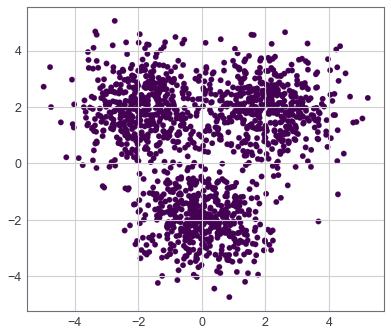

In [81]:
print(classification_rate(Y, Y_hat))
plt.scatter(X[:,0], X[:,1], c=Y_hat)

(1500, 3)
cost: -2755.294566521601 classification_rate: 0.3333333333333333
(1500, 3)
cost: -182.38933206595658 classification_rate: 0.9706666666666667
(1500, 3)
cost: -161.824009906226 classification_rate: 0.9713333333333334
(1500, 3)
cost: -153.20983678529257 classification_rate: 0.9693333333333334
(1500, 3)
cost: -147.61131308921026 classification_rate: 0.97
(1500, 3)
cost: -143.8126922171661 classification_rate: 0.9686666666666667
(1500, 3)
cost: -140.99354483871397 classification_rate: 0.97
(1500, 3)
cost: -138.8039789140503 classification_rate: 0.972
(1500, 3)
cost: -137.08876643498584 classification_rate: 0.9726666666666667
(1500, 3)
cost: -135.7303829593462 classification_rate: 0.9713333333333334


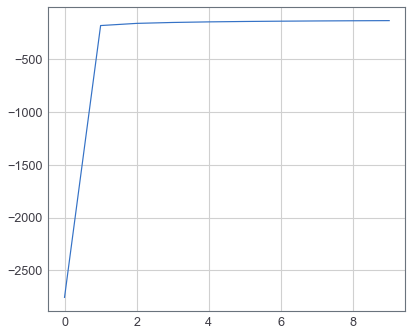

In [82]:
learning_rate = 1e-3
costs = []
for epoch in range(1000):
    Y_hat, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        print(Y_hat.shape)
        c = cost(T, Y_hat)
        P = np.argmax(Y_hat, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs.append(c)

    # this is gradient ASCENT, not DESCENT
    # be comfortable with both!
    # oldW2 = W2.copy()
    W2 += learning_rate * dJ_dw2(T, Y_hat, hidden)
    b2 += learning_rate * derivative_b2(T, Y_hat)
    W1 += learning_rate * dJ_dw1(T, Y_hat, hidden, X, W2)
    b1 += learning_rate * derivative_b1(T, Y_hat, W2, hidden)

plt.plot(costs)
plt.show()